In [10]:
pip install pandas numpy yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 1.9 MB/s eta 0:00:02
     --- ------------------------------------ 0.3/3.0 MB 4.1 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 MB 4.9 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB 5

## Import Necessary Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

### Get the stock data to get started, use the yfincance library to do so

In [17]:
start = '2005-01-01'
end = '2024-01-01'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.955513,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.965326,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.973780,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.974536,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.045493,2227450400


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


### Change the index to drop the dates column

In [19]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.955513,691992000
1,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.965326,1096810400
2,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.973780,680433600
3,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.974536,705555200
4,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.045493,2227450400


In [22]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.156786,1.162679,1.117857,1.130179,691992000
1,1.139107,1.169107,1.124464,1.141786,1096810400
2,1.151071,1.165179,1.143750,1.151786,680433600
3,1.154821,1.159107,1.130893,1.152679,705555200
4,1.160714,1.243393,1.156250,1.236607,2227450400


In [24]:
df.tail()

,Open,High,Low,Close,Volume
4776,195.179993,195.410004,192.970001,193.600006,37122800
4777,193.610001,193.889999,192.830002,193.050003,28919300
4778,192.490005,193.500000,191.089996,193.149994,48087700
4779,194.139999,194.660004,193.169998,193.580002,34049900
4780,193.899994,194.399994,191.729996,192.529999,42628800


### Plotting the graph for the closing prices

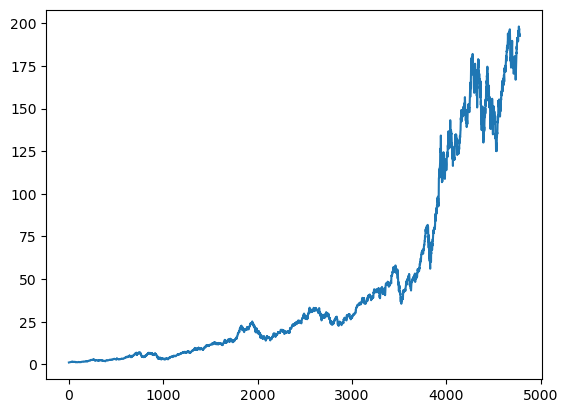

In [23]:
plt.plot(df.Close)

### Calculating the Moving average for 100 days

In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4776    181.768301
4777    181.787101
4778    181.898701
4779    182.046001
4780    182.173301
Name: Close, Length: 4781, dtype: float64

### Plot the moving average on the closing graph

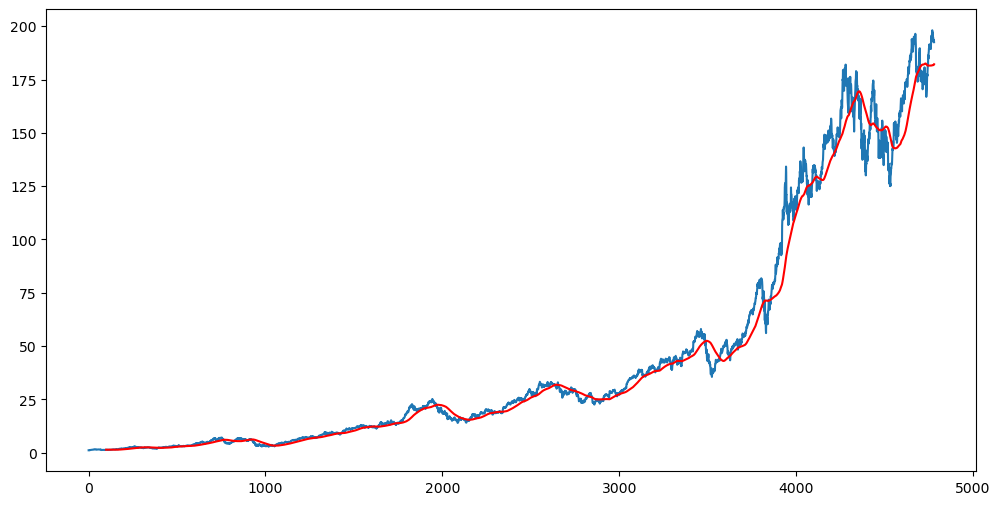

In [27]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')